In [12]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings
import copy
import os
import glob
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
from scipy import stats
import math
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# libraries for Linear regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.api import OLS
from sklearn.metrics import r2_score

In [15]:
# libraries for NN
# if want to import keras from tf.keras :
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python import keras as k
from tensorflow.keras.callbacks import LearningRateScheduler

# #if want to import keras from Keras API:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM, BatchNormalization
# from keras.callbacks import TensorBoard
# from keras.callbacks import ModelCheckpoint
# from keras.optimizers import adam_v2


In [16]:
PyDirectory = r'drive/Shareddrives/DS4W-Team/NN'
OutDirectory = PyDirectory+"/Results"
if not os.path.exists(OutDirectory):
    os.mkdir(OutDirectory)

In [17]:
# read cleaned data
train_median_pop = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/train_median_pop.csv', delimiter=',')
kaggle = pd.read_csv('drive/Shareddrives/DS4W-Team/Data//test.csv', delimiter=',')
train_median_pop

,Year_Factor,State_Factor,building_class,facility_type,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,1_min,2_min,3_min,1_avg,2_avg,3_avg,1_max,2_max,3_max,1_span,2_span,3_span,floor_area_log
0,1,State_1,Commercial,Grocery_store_or_food_market,1942.0,11.0,2.4,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,248.682615,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,11.022589
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,1955.0,45.0,1.8,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,26.500150,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,12.520883
2,1,State_1,Commercial,Retail_Enclosed_mall,1951.0,97.0,1.8,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,24.693619,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,12.542634
3,1,State_1,Commercial,Education_Other_classroom,1980.0,46.0,1.8,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,48.406926,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,10.920980
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,1985.0,100.0,2.4,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,3.899395,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,11.097410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,1995.0,8.0,36.6,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,1.0,1.0,1.0,104.0,132.918411,28,44,24,49.186383,63.941613,48.406272,89,91,71,61,47,47,9.923780
75753,6,State_11,Residential,5plus_Unit_Building,1910.0,98.0,36.6,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,1.0,1.0,1.0,104.0,39.483672,28,44,24,49.186383,63.941613,48.406272,89,91,71,61,47,47,10.608786
75754,6,State_11,Commercial,Commercial_Other,1917.0,67.0,36.6,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,1.0,1.0,1.0,104.0,48.404398,26,40,15,42.443219,56.506559,40.883333,79,87,62,53,47,47,10.242528
75755,6,State_11,Commercial,Commercial_Other,2012.0,67.0,36.6,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,1.0,1.0,1.0,104.0,592.022750,26,40,15,42.443219,56.506559,40.883333,79,87,62,53,47,47,10.888838


In [18]:
# Transform categorical variables to dummies

# train_median_pop['Year_Factor'] = train_median_pop['Year_Factor'].astype('object')   -> this line is commented so Year_Factor is kept as a numeric feature

Categorical_features = train_median_pop.select_dtypes(include='object').columns.to_list()
Numerical_features = train_median_pop.select_dtypes(include='number').columns.to_list()

print('Categorical Features:', Categorical_features, '\n')
print('Numerical Features:', Numerical_features)
x_cat = train_median_pop[Categorical_features]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_cat)

x_cat_arr = enc.transform(x_cat).toarray()

x_cat_df = pd.DataFrame(x_cat_arr, columns = enc.get_feature_names(Categorical_features))
x_cat_df
train_median_pop = pd.concat([train_median_pop, x_cat_df], axis = 1).drop(Categorical_features, axis = 1)
train_median_pop

Categorical Features: ['State_Factor', 'building_class', 'facility_type'] 

Numerical Features: ['Year_Factor', 'year_built', 'energy_star_rating', 'ELEVATION', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', '1_min', '2_min', '3_min', '1_avg', '2_avg', '3_avg', '1_max', '2_max', '3_max', '1_span', '2_span', '3_span', 'floor_area_log']


,Year_Factor,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,1_min,2_min,3_min,1_avg,2_avg,3_avg,1_max,2_max,3_max,1_span,2_span,3_span,floor_area_log,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4_Unit_Building,facility_type_5plus_Unit_Building,facility_type_Commercial_Other,facility_type_Commercial_Unknown,facility_type_Data_Center,...,facility_type_Food_Service_Other,facility_type_Food_Service_Restaurant_or_cafeteria,facility_type_Food_Service_Uncategorized,facility_type_Grocery_store_or_food_market,facility_type_Health_Care_Inpatient,facility_type_Health_Care_Outpatient_Clinic,facility_type_Health_Care_Outpatient_Uncategorized,facility_type_Health_Care_Uncategorized,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging_Dormitory_or_fraternity_sorority,facility_type_Lodging_Hotel,facility_type_Lodging_Other,facility_type_Lodging_Uncategorized,facility_type_Mixed_Use_Commercial_and_Residential,facility_type_Mixed_Use_Predominantly_Commercial,facility_type_Mixed_Use_Predominantly_Residential,facility_type_Multifamily_Uncategorized,facility_type_Nursing_Home,facility_type_Office_Bank_or_other_financial,facility_type_Office_Medical_non_diagnostic,facility_type_Office_Mixed_use,facility_type_Office_Uncategorized,facility_type_Parking_Garage,facility_type_Public_Assembly_Drama_theater,facility_type_Public_Assembly_Entertainment_culture,facility_type_Public_Assembly_Library,facility_type_Public_Assembly_Movie_Theater,facility_type_Public_Assembly_Other,facility_type_Public_Assembly_Recreation,facility_type_Public_Assembly_Social_meeting,facility_type_Public_Assembly_Stadium,facility_type_Public_Assembly_Uncategorized,facility_type_Public_Safety_Courthouse,facility_type_Public_Safety_Fire_or_police_station,facility_type_Public_Safety_Penitentiary,facility_type_Public_Safety_Uncategorized,facility_type_Religious_worship,facility_type_Retail_Enclosed_mall,facility_type_Retail_Strip_shopping_mall,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
0,1,1942.0,11.0,2.4,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,248.682615,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,11.022589,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1955.0,45.0,1.8,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,26.500150,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,12.520883,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1951.0,97.0,1.8,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,24.693619,35,46,36,52.570709,61.378387,55.363441,80,90,83,45,44,47,12.542634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# Normalizing the data (feature scaling)

x = train_median_pop.loc[:, train_median_pop.columns != 'site_eui']
y = train_median_pop['site_eui']

scaler = StandardScaler()
scaler_x = scaler.fit(x)
x_n = scaler_x.fit_transform(x)
scaler_y = scaler.fit(pd.DataFrame(y))
y_n = scaler_y.fit_transform(pd.DataFrame(y))

print(x_n.shape,y_n.shape)
print(x['facility_type_2to4_Unit_Building'].values)
print(x_n[:,x.columns.get_loc('facility_type_2to4_Unit_Building')])
print(x['facility_type_Grocery_store_or_food_market'].values)
print(x_n[:,x.columns.get_loc('facility_type_Grocery_store_or_food_market')])


(75757, 104) (75757, 1)
[0. 0. 0. ... 0. 0. 1.]
[-0.16008804 -0.16008804 -0.16008804 ... -0.16008804 -0.16008804
  6.24656271]
[1. 0. 0. ... 0. 0. 0.]
[12.96535562 -0.07712862 -0.07712862 ... -0.07712862 -0.07712862
 -0.07712862]


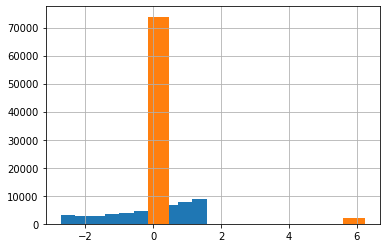

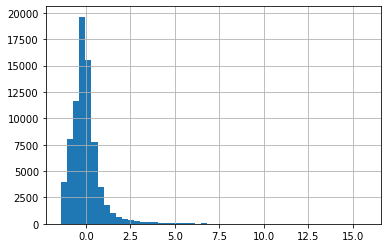

In [ ]:
# see e*_scaled & site_eui_scaled:
x_n_df = pd.DataFrame(x_n, index=x.index, columns=x.columns)
x_n_df['energy_star_rating'].hist()
x_n_df['facility_type_2to4_Unit_Building'].hist()

y_n_df = pd.DataFrame(y_n, index=pd.DataFrame(y).index, columns=pd.DataFrame(y).columns)
plt.figure()
y_n_df['site_eui'].hist(bins=50)



In [ ]:
# split data to train data and test data
X_train , X_test, Y_train , Y_test = train_test_split(x_n , y_n, test_size=0.1, random_state=17)
print(X_train.shape,X_test.shape)


(68181, 104) (7576, 104)


In [ ]:
# deine a function for plotting the loss
def loss_plot(OutDirectory,history):
    if not os.path.exists(OutDirectory+weightsdir):
        os.mkdir(OutDirectory+weightsdir)
    for loss in history.history:
        np.savetxt(OutDirectory+weightsdir+"/{}-{}.csv".format(VNew,loss), 
                    np.array(history.history[loss]))        
    width=2
    fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
    plt.semilogy(history.history['loss'])
    plt.ylabel('Loss $ \mathcal{L} $',fontsize=10) 
    plt.xlabel('epochs',fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Prediction-{VNew}')
    plt.grid (b=False)
    fig.savefig(OutDirectory+weightsdir+"/{}-loss.png".format(VNew),bbox_inches='tight')


# Define a callback for printing the learning rate at the end of each epoch.
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(',LR=%.4e \n '%model_NN.optimizer.lr.numpy())

# 1_4L*20N_full batch training 

In [ ]:
# compile a NN with 4 hidden layers, each 20 neurons
model_NN = Sequential()
n_cols = X_train.shape[1]
print(n_cols)
model_NN.add(Dense(20,activation='relu',input_shape=(n_cols,)))
model_NN.add(Dense(20,activation='relu'))
model_NN.add(Dense(20,activation='relu'))
model_NN.add(Dense(20,activation='relu'))
model_NN.add(Dense(1))
model_NN.compile(optimizer=tf.keras.optimizers.Adam()
                    ,loss='mean_squared_error')


104


In [ ]:
train_flag=0 # want to train more? input 0 or 1 

In [ ]:
# define functions for learning rate decay
def expo_decay1(epoch):
	initial_lrate = 1e-2
	decay_rate = 0.1
	decay_steps = 1000
	lrate = initial_lrate * math.pow(decay_rate, epoch/decay_steps)
	return lrate
def expo_decay2(epoch):
	initial_lrate = 1e-3
	decay_rate = 0.1
	decay_steps = 1000
	lrate = initial_lrate * math.pow(decay_rate, epoch/decay_steps)
	return lrate

In [ ]:
for counter in [1,2]:               
  weightsdir='/weights_1'
  if not os.path.exists(OutDirectory+weightsdir):
      os.mkdir(OutDirectory+weightsdir)
  tr_best_end = 'best'  #'best' or 'end'
  txt= glob.glob(OutDirectory+weightsdir+'/*-{}.h5'.format(tr_best_end))
  VOld=len(txt)
  VNew=len(txt)+1 if train_flag==1 else VOld
  print('model_old=',VOld)
  print('model_new=',VNew)

  expo_decay=expo_decay1 if VNew==1 else expo_decay2
  
  lrate = LearningRateScheduler(expo_decay)

  my_callbacks = [
      tf.keras.callbacks.ModelCheckpoint(filepath=OutDirectory+weightsdir+f'/{VNew}-best.h5',
                                              verbose=0, monitor='loss', save_best_only=True,
                                              save_weights_only=True,) ,
      lrate,
      PrintLR(),
  ]


  if VOld!=0 :
      model_NN.load_weights(OutDirectory+weightsdir+'/{}-{}.h5'.format(VOld,tr_best_end)) 
  trained=1 if VOld!=0 else 0
  print('trained=',trained)


  if train_flag==1:
    h = model_NN.fit(X_train,Y_train,batch_size=70000,epochs=1000,callbacks=my_callbacks,verbose=2)

    # print(K.eval(model_NN.optimizer.lr))


    model_NN.save(OutDirectory+weightsdir+'/{}-model.h5'.format(VNew))

    loss_plot(OutDirectory,h)

    width=2
    fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
    Y_train_pred = model_NN.predict(X_train)
    plt.scatter(Y_train,Y_train_pred, s=0.1)
    plt.ylabel('Predictions_train',fontsize=10) 
    plt.xlabel('Ground truth',fontsize=10)
    plt.plot( [0,15],[0,15] , 'r')
    fig.savefig(OutDirectory+weightsdir+"/{}-predict-train.png".format(VNew),bbox_inches='tight')

    width=2
    fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
    Y_test_pred = model_NN.predict(X_test)
    plt.scatter(Y_test,Y_test_pred, s=0.1)
    plt.ylabel('Predictions_test',fontsize=10) 
    plt.xlabel('Ground truth',fontsize=10)
    plt.plot( [-2,10],[-2,10] , 'r')
    fig.savefig(OutDirectory+weightsdir+"/{}-predict-test.png".format(VNew),bbox_inches='tight')

model_old= 2
model_new= 2
trained= 1
model_old= 2
model_new= 2
trained= 1


train_mae_n 0.35639846140198167
train_rmse= 37.42042621219994   train_mse= 1400.2882979027004   train_r2= 0.28713514331798307


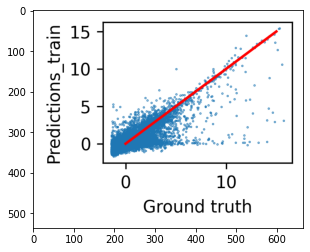

test_mae_n 0.3880518769588278
test_rmse= 44.52269054743435   test_mse= 1982.2699735826   test_r2= -0.06121650244677124


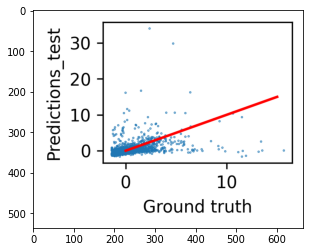

In [ ]:
from matplotlib import image
img_train = image.imread(OutDirectory+weightsdir+"/{}-predict-train.png".format(VNew))
train_mae_n = (mean_absolute_error((model_NN.predict(X_train)), (Y_train)))
print('train_mae_n',train_mae_n)
train_mse = (mean_squared_error(scaler.inverse_transform(model_NN.predict(X_train)), scaler.inverse_transform(Y_train)))
train_rmse = mean_squared_error(scaler.inverse_transform(model_NN.predict(X_train)), scaler.inverse_transform(Y_train), squared=False)
train_r2 = (r2_score(scaler.inverse_transform(model_NN.predict(X_train)), scaler.inverse_transform(Y_train)))
print(f'train_rmse=',train_rmse,' ','train_mse=',train_mse,' ','train_r2=',train_r2)

plt.imshow(img_train)
plt.show()
img_test = image.imread(OutDirectory+weightsdir+"/{}-predict-test.png".format(VNew))
test_mae_n = (mean_absolute_error((model_NN.predict(X_test)), (Y_test)))
print('test_mae_n',test_mae_n)
test_mse = (mean_squared_error(scaler.inverse_transform(model_NN.predict(X_test)), scaler.inverse_transform(Y_test)))
test_rmse = mean_squared_error(scaler.inverse_transform(model_NN.predict(X_test)), scaler.inverse_transform(Y_test), squared=False)
test_r2 = (r2_score(scaler.inverse_transform(model_NN.predict(X_test)), scaler.inverse_transform(Y_test)))
print(f'test_rmse=',test_rmse,' ','test_mse=',test_mse,' ','test_r2=',test_r2)
plt.imshow(img_test)
plt.show()


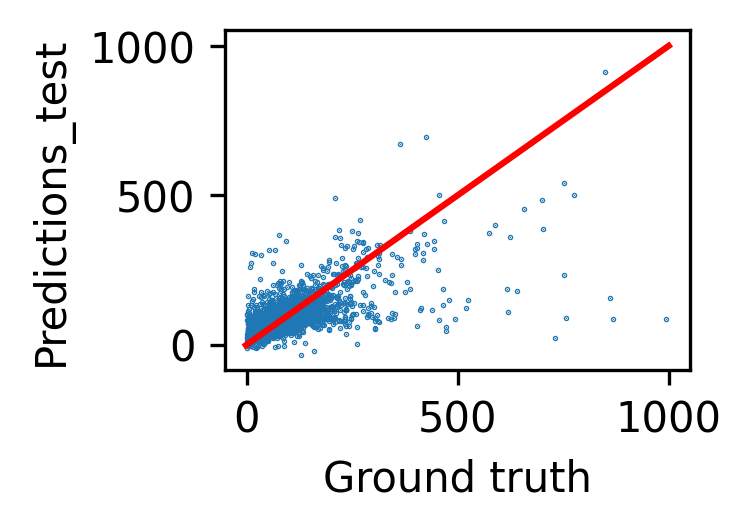

In [ ]:
width=2
fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
y_val_pred = scaler.inverse_transform(model_NN.predict(X_test))
plt.scatter(scaler.inverse_transform(Y_test),y_val_pred, s=0.1)
plt.ylabel('Predictions_test',fontsize=10) 
plt.xlabel('Ground truth',fontsize=10)
plt.plot( [-2,1000],[-2,1000] , 'r')

In [ ]:
# use LSTM? 
# dependent on time-series? 
# cleaned data

# 2_ 4L*40N_ Full Batch


In [ ]:
# compile a NN with 4 hidden layers, each 40 neurons
model_NN = Sequential()
n_cols = X_train.shape[1]
print(n_cols)
model_NN.add(Dense(40,activation='relu',input_shape=(n_cols,)))
model_NN.add(Dense(40,activation='relu'))
model_NN.add(Dense(40,activation='relu'))
model_NN.add(Dense(40,activation='relu'))
model_NN.add(Dense(1))
model_NN.compile(optimizer=tf.keras.optimizers.Adam()
                    ,loss='mean_squared_error')


104


In [ ]:
train_flag=0 # want to train more? input 0 or 1 

In [ ]:
for counter in [1,2]:               
  weightsdir='/weights_2'
  if not os.path.exists(OutDirectory+weightsdir):
      os.mkdir(OutDirectory+weightsdir)
  tr_best_end = 'best'  #'best' or 'end'
  txt= glob.glob(OutDirectory+weightsdir+'/*-{}.h5'.format(tr_best_end))
  VOld=len(txt)
  VNew=len(txt)+1 if train_flag==1 else VOld
  print('model_old=',VOld)
  print('model_new=',VNew)

  expo_decay=expo_decay1 if VNew==1 else expo_decay2
  
  lrate = LearningRateScheduler(expo_decay)

  my_callbacks = [
      tf.keras.callbacks.ModelCheckpoint(filepath=OutDirectory+weightsdir+f'/{VNew}-best.h5',
                                              verbose=0, monitor='loss', save_best_only=True,
                                              save_weights_only=True,) ,
      lrate,
      PrintLR(),
  ]


  if VOld!=0 :
      model_NN.load_weights(OutDirectory+weightsdir+'/{}-{}.h5'.format(VOld,tr_best_end)) 
  trained=1 if VOld!=0 else 0
  print('trained=',trained)


  if train_flag==1:
    h = model_NN.fit(X_train,Y_train,batch_size=70000,epochs=5000,callbacks=my_callbacks,verbose=2)

    # print(K.eval(model_NN.optimizer.lr))


    model_NN.save(OutDirectory+weightsdir+'/{}-model.h5'.format(VNew))

    loss_plot(OutDirectory,h)

    width=2
    fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
    Y_train_pred = model_NN.predict(X_train)
    plt.scatter(Y_train,Y_train_pred, s=0.1)
    plt.ylabel('Predictions_train',fontsize=10) 
    plt.xlabel('Ground truth',fontsize=10)
    plt.plot( [0,15],[0,15] , 'r')
    fig.savefig(OutDirectory+weightsdir+"/{}-predict-train.png".format(VNew),bbox_inches='tight')

    width=2
    fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
    Y_test_pred = model_NN.predict(X_test)
    plt.scatter(Y_test,Y_test_pred, s=0.1)
    plt.ylabel('Predictions_test',fontsize=10) 
    plt.xlabel('Ground truth',fontsize=10)
    plt.plot( [-2,10],[-2,10] , 'r')
    fig.savefig(OutDirectory+weightsdir+"/{}-predict-test.png".format(VNew),bbox_inches='tight')

model_old= 2
model_new= 2
trained= 1
model_old= 2
model_new= 2
trained= 1


train_mse= 0.22942231284638556
train_r2= 0.6998538664182212


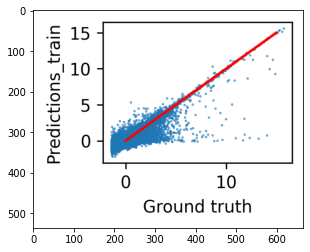

test_mse= 1.8171640110493097
test_r2= 0.05056433190072818


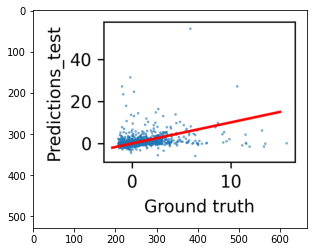

In [ ]:
from matplotlib import image
img_train = image.imread(OutDirectory+weightsdir+"/{}-predict-train.png".format(VNew))
train_mse = (mean_squared_error(model_NN.predict(X_train), Y_train))
print('train_mse=',train_mse)
train_r2 = (r2_score(model_NN.predict(X_train), Y_train))
print('train_r2=',train_r2)
plt.imshow(img_train)
plt.show()
img_test = image.imread(OutDirectory+weightsdir+"/{}-predict-test.png".format(VNew))
test_mse = (mean_squared_error(model_NN.predict(X_test), Y_test))
print('test_mse=',test_mse)
test_r2 = (r2_score(model_NN.predict(X_test), Y_test))
print('test_r2=',test_r2)
plt.imshow(img_test)
plt.show()


# 3- Using latest clean data 38_predictors

In [22]:
train_38_predictors = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/train_38_predictors.csv', delimiter=',')
train_38_predictors

,floor_area,energy_star_rating,ELEVATION,heating_degree_days,precipitation_inches,avg_temp,days_above_80F,days_above_100F,age,1_min,3_min,4_max,State_Factor_State_2,State_Factor_State_6,building_class_Commercial,facility_type_facility_group_0,facility_type_facility_group_1,facility_type_facility_group_10,facility_type_facility_group_11,facility_type_facility_group_12,facility_type_facility_group_13,facility_type_facility_group_14,facility_type_facility_group_16,facility_type_facility_group_17,facility_type_facility_group_18,facility_type_facility_group_19,facility_type_facility_group_2,facility_type_facility_group_20,facility_type_facility_group_21,facility_type_facility_group_22,facility_type_facility_group_23,facility_type_facility_group_24,facility_type_facility_group_4,facility_type_facility_group_5,facility_type_facility_group_6,facility_type_facility_group_7,facility_type_facility_group_8,facility_type_facility_group_9,site_eui
0,4.787049,11.000000,2.4,2960,16.59,56.972603,14,0,80.0,35,41,84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.682615
1,5.437751,45.000000,1.8,2960,16.59,56.972603,14,0,67.0,35,41,84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.500150
2,5.447197,97.000000,1.8,2960,16.59,56.972603,14,0,71.0,35,41,84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.693619
3,4.742921,46.000000,1.8,2960,16.59,56.972603,14,0,42.0,35,41,84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,48.406926
4,4.819544,100.000000,2.4,2960,16.59,56.972603,14,0,37.0,35,41,84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,4.309843,8.000000,36.6,3772,45.03,55.147541,25,0,27.0,28,39,79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.918411
75753,4.607337,98.000000,36.6,3772,45.03,55.147541,25,0,112.0,28,39,79,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.483672
75754,4.448273,61.048605,36.6,6218,106.32,47.911202,6,0,105.0,26,34,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.404398
75755,4.728962,61.048605,36.6,6218,106.32,47.911202,6,0,10.0,26,34,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,592.022750


In [23]:
test_38_predictors = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/test_38_predictors.csv', delimiter=',')
test_38_predictors

,floor_area,energy_star_rating,ELEVATION,heating_degree_days,precipitation_inches,avg_temp,days_above_80F,days_above_100F,age,1_min,3_min,4_max,State_Factor_State_2,State_Factor_State_6,building_class_Commercial,facility_type_facility_group_0,facility_type_facility_group_1,facility_type_facility_group_10,facility_type_facility_group_11,facility_type_facility_group_12,facility_type_facility_group_13,facility_type_facility_group_14,facility_type_facility_group_16,facility_type_facility_group_17,facility_type_facility_group_18,facility_type_facility_group_19,facility_type_facility_group_2,facility_type_facility_group_20,facility_type_facility_group_21,facility_type_facility_group_22,facility_type_facility_group_23,facility_type_facility_group_24,facility_type_facility_group_4,facility_type_facility_group_5,facility_type_facility_group_6,facility_type_facility_group_7,facility_type_facility_group_8,facility_type_facility_group_9
0,4.454601,37.0,2.4,2112,25.24,59.894521,29,2,28.0,38,45,85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.340563,55.0,45.7,2112,25.24,59.894521,29,2,61.0,38,45,85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.207850,1.0,59.1,2112,25.24,59.894521,29,2,72.0,38,45,85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.988657,34.0,35.4,2112,25.24,59.894521,29,2,51.0,38,45,85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.787049,35.0,1.8,2112,25.24,59.894521,29,2,80.0,38,45,85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,5.485615,99.0,812.0,4478,44.83,53.420548,39,0,9.0,21,36,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9701,4.542937,94.0,26.5,4478,44.83,53.420548,39,0,112.0,21,36,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9702,4.627294,94.0,812.0,4478,44.83,53.420548,39,0,8.0,21,36,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9703,4.404286,79.0,812.0,4478,44.83,53.420548,39,0,30.0,21,36,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Normalizing the data (feature scaling)

from sklearn.preprocessing import MinMaxScaler
x = train_38_predictors.loc[:, train_38_predictors.columns != 'site_eui']
y = train_38_predictors['site_eui']

scalerx = MinMaxScaler()
scaler_x = scalerx.fit(x)
x_n = scaler_x.transform(x)
# print(scalerx.mean_)

# scalery = MinMaxScaler()
# scaler_y = scalery.fit(pd.DataFrame(y))
y_n = y
# print(scalery.mean_)

print(x_n.shape,y_n.shape)

(75757, 38) (75757,)


In [ ]:
# # see e*_scaled & site_eui_scaled:
# x_n_df = pd.DataFrame(x_n, index=x.index, columns=x.columns)
# x_n_df['energy_star_rating'].hist()

# y_n_df = pd.DataFrame(y_n, index=pd.DataFrame(y).index, columns=pd.DataFrame(y).columns)
# plt.figure()
# y_n_df['site_eui'].hist(bins=50)


In [26]:
x_test = test_38_predictors.loc[:, test_38_predictors.columns]

x_n_test = scaler_x.transform(x_test)

print(x_n_test.shape)

(9705, 38)


In [46]:
Y_val_pred = np.zeros(x.shape[0],)
n_cols = x.shape[1]
print(n_cols)
ACT= 'relu' # try swish as well. 
def make_model(n_cols):
    model_NN = Sequential()
    print(n_cols)
    model_NN.add(Dense(20,activation=ACT,input_shape=(n_cols,)))
    model_NN.add(Dense(20,activation=ACT))
    model_NN.add(Dense(20,activation=ACT))
    model_NN.add(Dense(20,activation=ACT))
    model_NN.add(Dense(1))
    rmse = tf.keras.metrics.RootMeanSquaredError('rmse')
    model_NN.compile(optimizer=tf.keras.optimizers.Adam()
                        ,loss='mean_squared_error',metrics=[rmse,'mae'])   
    return model_NN
model_NN = make_model(n_cols)

38
38


In [52]:
def loss_plot(OutDirectory,history,idx):
    # if not os.path.exists(OutDirectory+weightsdir):
    #     os.mkdir(OutDirectory+weightsdir)
    for loss in history.history:
        np.savetxt(OutDirectory+"/{}-{}.csv".format(idx,loss), 
                    np.array(history.history[loss]))        
    width=2
    fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
    plt.semilogy(history.history['loss'])
    plt.ylabel('Loss $ \mathcal{L} $',fontsize=10) 
    plt.xlabel('epochs',fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Prediction-{idx}')
    plt.grid (b=False)
    plt.show()
    fig.savefig(OutDirectory+"/{}-loss.png".format(idx),bbox_inches='tight')

FOLD: 1
38
Epoch 1/500

Epoch 1: val_loss improved from inf to 3937.10498, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w1.h5
99/99 - 2s - loss: 8576.7969 - rmse: 92.6110 - mae: 71.9765 - val_loss: 3937.1050 - val_rmse: 62.7464 - val_mae: 34.5925 - lr: 0.0010 - 2s/epoch - 18ms/step
Epoch 2/500

Epoch 2: val_loss improved from 3937.10498 to 3336.87744, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w1.h5
99/99 - 1s - loss: 3229.1775 - rmse: 56.8259 - mae: 33.1949 - val_loss: 3336.8774 - val_rmse: 57.7657 - val_mae: 32.4356 - lr: 0.0010 - 516ms/epoch - 5ms/step
Epoch 3/500

Epoch 3: val_loss improved from 3336.87744 to 3074.26880, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w1.h5
99/99 - 0s - loss: 2961.7480 - rmse: 54.4219 - mae: 30.9585 - val_loss: 3074.2688 - val_rmse: 55.4461 - val_mae: 29.8769 - lr: 0.0010 - 475ms/epoch - 5ms/step
Epoch 4/500

Epoch 4: val_loss improved from 3074.26880 to 2780.43823, saving model to drive/Shareddrives/DS4W-Team/NN/Res

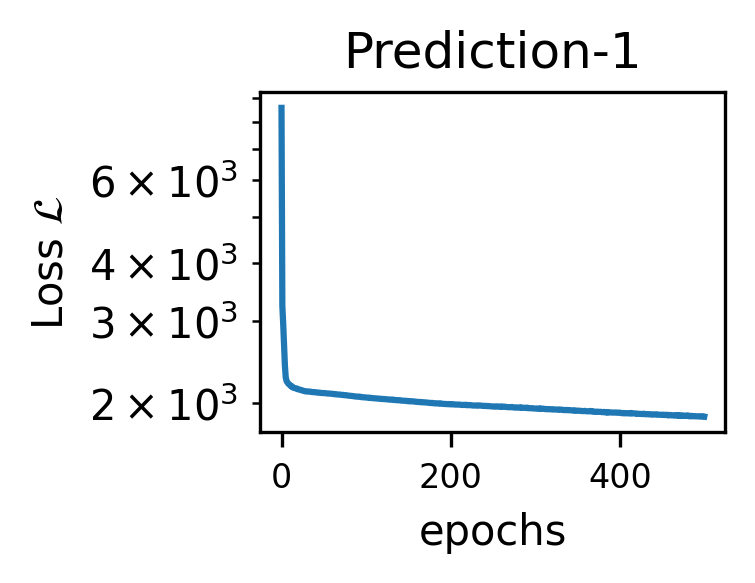

FOLD: 2
38
Epoch 1/500

Epoch 1: val_loss improved from inf to 5730.66895, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w2.h5
99/99 - 1s - loss: 9494.3994 - rmse: 97.4392 - mae: 77.2600 - val_loss: 5730.6689 - val_rmse: 75.7012 - val_mae: 52.9649 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 2/500

Epoch 2: val_loss improved from 5730.66895 to 3045.08350, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w2.h5
99/99 - 0s - loss: 3709.0312 - rmse: 60.9018 - mae: 35.7723 - val_loss: 3045.0835 - val_rmse: 55.1823 - val_mae: 32.7768 - lr: 0.0010 - 321ms/epoch - 3ms/step
Epoch 3/500

Epoch 3: val_loss improved from 3045.08350 to 2822.12280, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w2.h5
99/99 - 0s - loss: 3242.6541 - rmse: 56.9443 - mae: 32.1766 - val_loss: 2822.1228 - val_rmse: 53.1237 - val_mae: 30.9602 - lr: 0.0010 - 305ms/epoch - 3ms/step
Epoch 4/500

Epoch 4: val_loss improved from 2822.12280 to 2547.01855, saving model to drive/Shareddrives/DS4W-Team/NN/Res

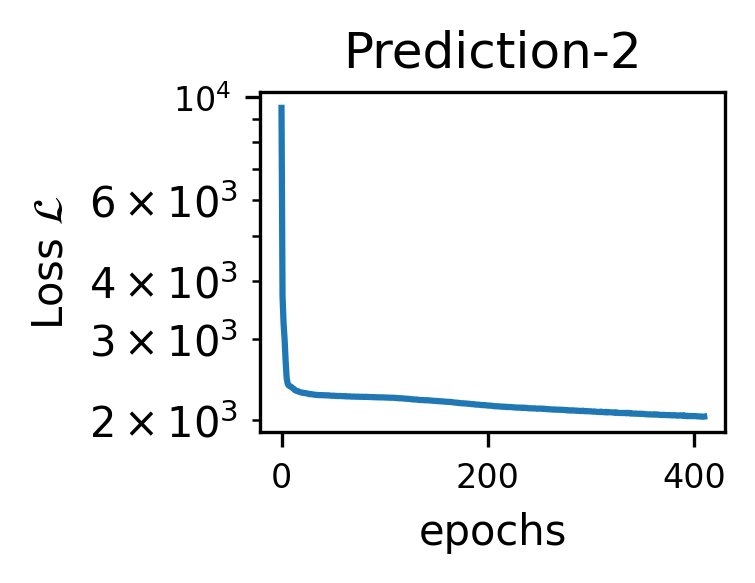

FOLD: 3
38
Epoch 1/500

Epoch 1: val_loss improved from inf to 7193.17773, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w3.h5
99/99 - 1s - loss: 9592.7812 - rmse: 97.9427 - mae: 78.8048 - val_loss: 7193.1777 - val_rmse: 84.8126 - val_mae: 62.2780 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 2/500

Epoch 2: val_loss improved from 7193.17773 to 3244.59253, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w3.h5
99/99 - 0s - loss: 3839.1274 - rmse: 61.9607 - mae: 37.4565 - val_loss: 3244.5925 - val_rmse: 56.9613 - val_mae: 32.7076 - lr: 0.0010 - 312ms/epoch - 3ms/step
Epoch 3/500

Epoch 3: val_loss improved from 3244.59253 to 2852.99658, saving model to drive/Shareddrives/DS4W-Team/NN/Results/w3.h5
99/99 - 0s - loss: 3000.3201 - rmse: 54.7752 - mae: 30.8960 - val_loss: 2852.9966 - val_rmse: 53.4134 - val_mae: 29.3868 - lr: 0.0010 - 313ms/epoch - 3ms/step
Epoch 4/500

Epoch 4: val_loss improved from 2852.99658 to 2517.47070, saving model to drive/Shareddrives/DS4W-Team/NN/Res

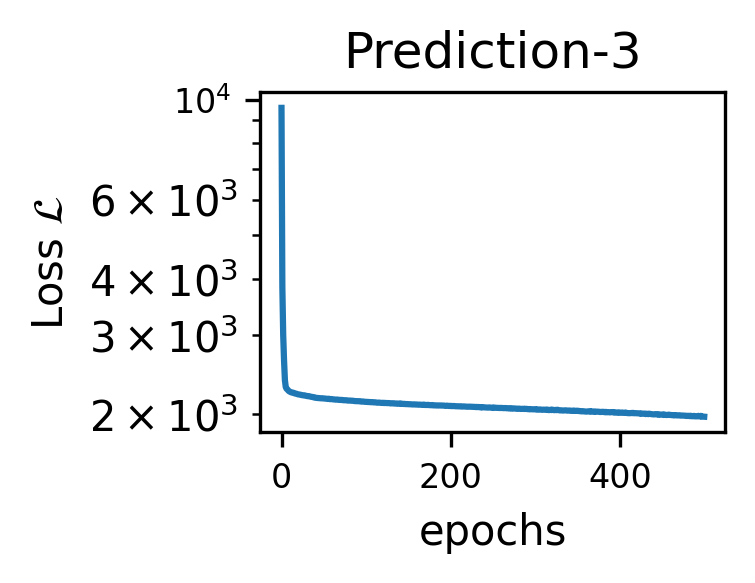

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

N_FOLDS = 3
EPOCHS = 500
rmse_train = []
rmse_val = []
mae_train = []
mae_val = []
from sklearn.model_selection import KFold
kfold = KFold(n_splits=N_FOLDS, shuffle=True, random_state=1)
# kf = StratifiedKFold(n_splits=N_FOLDS, random_state=19901028, shuffle=True)
idx = 0
for train_indices, valid_indices in kfold.split(x_n):
    idx += 1
    print("FOLD:", idx)
    X_train = x_n[train_indices] #X used for training of current split
    Y_train = y_n[train_indices] 
    X_val =  x_n[valid_indices] 
    Y_val = y_n[valid_indices] 
    # print(X_train.shape,X_val.shape)

    model_NN = make_model(n_cols)   
    ckpt = ModelCheckpoint(OutDirectory+f"/w{idx}.h5", monitor='val_loss', verbose=1, save_best_only=True,mode='min')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, min_lr=0.0005)
    es = EarlyStopping(monitor='val_loss', patience=18)  

    h = model_NN.fit(X_train,Y_train,epochs=EPOCHS,verbose=2,validation_data=(X_val,Y_val),
         batch_size=512,callbacks=[ckpt, reduce_lr, es])
    Y_val_pred[valid_indices] = model_NN.predict(X_val)[:, 0]
    loss_plot(OutDirectory,h,idx)
    rmse_train.append(h.history['rmse'][-1])
    rmse_val.append(h.history['val_rmse'][-1])
    mae_train.append(h.history['mae'][-1])
    mae_val.append(h.history['val_mae'][-1])

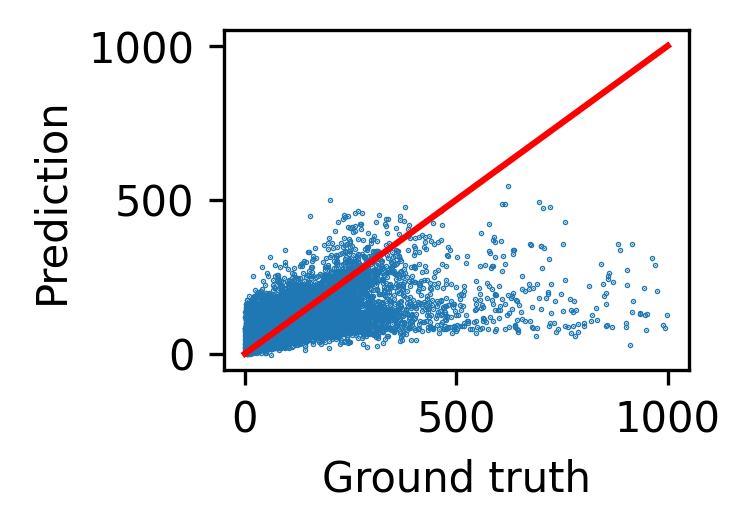

In [56]:
width=2
fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
plt.scatter(y_n,Y_val_pred, s=0.1)
plt.ylabel('Prediction',fontsize=10) 
plt.xlabel('Ground truth',fontsize=10)
plt.plot( [0,1000],[0,1000] , 'r')
fig.savefig(OutDirectory+"/predict-val.png",bbox_inches='tight')

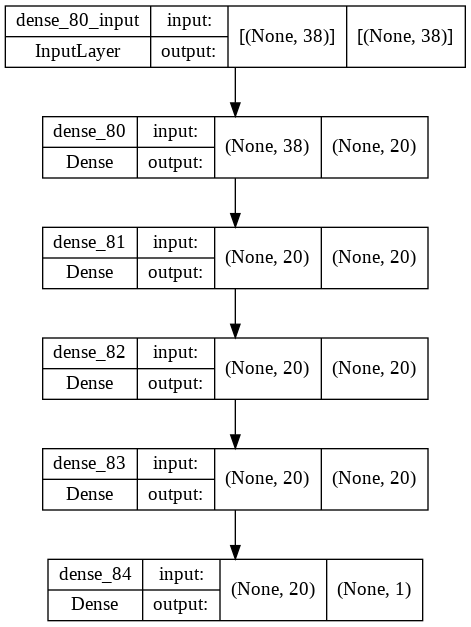

In [55]:
from keras.utils.vis_utils import plot_model
plot_model(model_NN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

RMSE: 44.508305123168164
MAE: 22.84179992291463
R^2:  0.4162654094259719
 
RMSE val:  44.15245218311453
MAE val:  22.768398798279932
R^2 val:  0.4328888696414026
 
RMSE train:  44.68516541501491
MAE train:  22.878499758560114
R^2 train:  0.4077878841713184


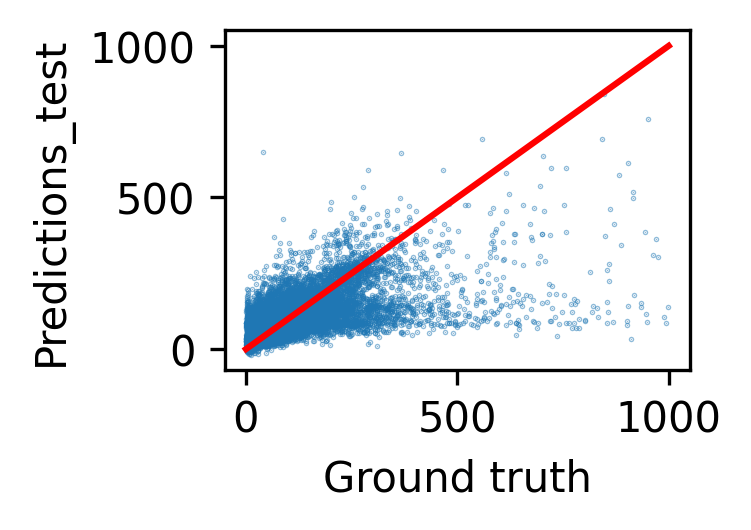

In [ ]:
score = mean_squared_error(scaler_y.inverse_transform(y_n),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred)) , squared=False)
scoremae = mean_absolute_error(scaler_y.inverse_transform(y_n),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred)))
scoreRsq = r2_score(scaler_y.inverse_transform(y_n),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred)))

print("RMSE:", score)
print("MAE:", scoremae)
print('R^2: ', scoreRsq)
print(' ')

scoreval = mean_squared_error(scaler_y.inverse_transform(y_n[valid_indices]),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred[valid_indices])) , squared=False)
scoremaeval = mean_absolute_error(scaler_y.inverse_transform(y_n[valid_indices]),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred[valid_indices])))
scoreRsqval = r2_score(scaler_y.inverse_transform(y_n[valid_indices]),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred[valid_indices])))
print('RMSE val: ', scoreval)
print('MAE val: ', scoremaeval)
print('R^2 val: ', scoreRsqval)
print(' ')
scoretrain = mean_squared_error(scaler_y.inverse_transform(y_n[train_indices]),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred[train_indices])) , squared=False)
scoremaetrain = mean_absolute_error(scaler_y.inverse_transform(y_n[train_indices]),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred[train_indices])))
scoreRsqtrain = r2_score(scaler_y.inverse_transform(y_n[train_indices]),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred[train_indices])))
print('RMSE train: ', scoretrain)
print('MAE train: ', scoremaetrain)
print('R^2 train: ', scoreRsqtrain)

width=2
fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
plt.scatter(scaler_y.inverse_transform(y_n),scaler_y.inverse_transform(pd.DataFrame(Y_val_pred)), s=0.1, alpha = .5)
#plt.scatter(fill_style = 'full'length, width, s=size, c=color, alpha=transparency)
plt.ylabel('Predictions_test',fontsize=10) 
plt.xlabel('Ground truth',fontsize=10)
plt.plot( [0,1000],[0,1000] , 'r')

# Misc

In [ ]:
# # split data to train data and test data
# X_train , X_test, Y_train , Y_test = train_test_split(x_n , y_n, test_size=0.1, random_state=172)
# print(X_train.shape,X_test.shape)

(68181, 38) (7576, 38)


In [ ]:
# deine a function for plotting the loss
def loss_plot(OutDirectory,history):
    if not os.path.exists(OutDirectory+weightsdir):
        os.mkdir(OutDirectory+weightsdir)
    for loss in history.history:
        np.savetxt(OutDirectory+weightsdir+"/{}-{}.csv".format(VNew,loss), 
                    np.array(history.history[loss]))        
    width=2
    fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
    plt.semilogy(history.history['loss'])
    plt.ylabel('Loss $ \mathcal{L} $',fontsize=10) 
    plt.xlabel('epochs',fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Prediction-{VNew}')
    plt.grid (b=False)
    fig.savefig(OutDirectory+weightsdir+"/{}-loss.png".format(VNew),bbox_inches='tight')


# Define a callback for printing the learning rate at the end of each epoch.
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(',LR=%.4e \n '%model_NN.optimizer.lr.numpy())


def expo_decay1(epoch):
    initial_lrate = 1e-2
    decay_rate = 0.1
    decay_steps = 1000
    lrate = initial_lrate * math.pow(decay_rate, epoch/decay_steps)
    return lrate
def expo_decay2(epoch):
    initial_lrate = 1e-3
    decay_rate = 0.1
    decay_steps = 1000
    lrate = initial_lrate * math.pow(decay_rate, epoch/decay_steps)
    return lrate



In [ ]:
N_FOLDS = 3
EPOCHS = 100
model_NN = make_model(n_cols)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=N_FOLDS, shuffle=True, random_state=1)
# kf = StratifiedKFold(n_splits=N_FOLDS, random_state=19901028, shuffle=True)
idx = 0
for train_indices, valid_indices in kfold.split(x_n):
    idx += 1
    print("FOLD:", idx)
    X_train = x_n[train_indices] #X used for training of current split
    Y_train = y_n[train_indices] 
    X_val =  x_n[valid_indices] 
    Y_val = y_n[valid_indices] 
    # print(X_train.shape,X_val.shape)
    
    expo_decay=expo_decay2
    lrate = LearningRateScheduler(expo_decay)   
    my_callbacks = [
    lrate,
    ]
    h = model_NN.fit(X_train,Y_train,epochs=EPOCHS,verbose=2,validation_data=(X_val,Y_val), batch_size=512,callbacks=my_callbacks)
    Y_val_pred[valid_indices] = model_NN.predict(X_val)[:, 0]


38
FOLD: 1
Epoch 1/100
99/99 - 1s - loss: 0.0035 - rmse: 0.0593 - val_loss: 0.0030 - val_rmse: 0.0551 - lr: 0.0010 - 1s/epoch - 15ms/step
Epoch 2/100
99/99 - 1s - loss: 0.0026 - rmse: 0.0506 - val_loss: 0.0025 - val_rmse: 0.0503 - lr: 9.9770e-04 - 505ms/epoch - 5ms/step
Epoch 3/100
99/99 - 1s - loss: 0.0022 - rmse: 0.0473 - val_loss: 0.0024 - val_rmse: 0.0489 - lr: 9.9541e-04 - 503ms/epoch - 5ms/step
Epoch 4/100
99/99 - 0s - loss: 0.0022 - rmse: 0.0464 - val_loss: 0.0024 - val_rmse: 0.0486 - lr: 9.9312e-04 - 478ms/epoch - 5ms/step
Epoch 5/100
99/99 - 0s - loss: 0.0021 - rmse: 0.0461 - val_loss: 0.0024 - val_rmse: 0.0485 - lr: 9.9083e-04 - 470ms/epoch - 5ms/step
Epoch 6/100
99/99 - 0s - loss: 0.0021 - rmse: 0.0459 - val_loss: 0.0023 - val_rmse: 0.0482 - lr: 9.8855e-04 - 476ms/epoch - 5ms/step
Epoch 7/100
99/99 - 0s - loss: 0.0021 - rmse: 0.0457 - val_loss: 0.0023 - val_rmse: 0.0481 - lr: 9.8628e-04 - 451ms/epoch - 5ms/step
Epoch 8/100
99/99 - 0s - loss: 0.0021 - rmse: 0.0456 - val_loss:

In [ ]:
# # %%
# train_mae_n = (mean_absolute_error((model_NN.predict(X_train)), (Y_train)))
# train_mse_n = (mean_squared_error((model_NN.predict(X_train)), (Y_train)))
# print('train_mae_n',train_mae_n,'train_mse_n',train_mse_n)
# train_mse = (mean_squared_error(scaler_y.inverse_transform(model_NN.predict(X_train)), scaler_y.inverse_transform(Y_train)))
# train_rmse = mean_squared_error(scaler_y.inverse_transform(model_NN.predict(X_train)), scaler_y.inverse_transform(Y_train), squared=False)
# train_r2 = (r2_score(scaler_y.inverse_transform(model_NN.predict(X_train)), scaler_y.inverse_transform(Y_train)))
# print(f'train_rmse=',train_rmse,' ','train_mse=',train_mse,' ','train_r2=',train_r2)

# test_mae_n = (mean_absolute_error((model_NN.predict(X_test)), (Y_test)))
# test_mse_n = (mean_squared_error((model_NN.predict(X_test)), (Y_test)))
# print('test_mae_n',test_mae_n,'test_mse_n',test_mse_n)


# test_mae_n = (mean_absolute_error((model_NN.predict(X_test)), (Y_test)))
# test_mse_n = (mean_squared_error((model_NN.predict(X_test)), (Y_test)))
# print('test_mae_n',test_mae_n,'test_mse_n',test_mse_n)
# test_mse = (mean_squared_error(scaler_y.inverse_transform(model_NN.predict(X_test)), scaler_y.inverse_transform(Y_test)))
# test_rmse = mean_squared_error(scaler_y.inverse_transform(model_NN.predict(X_test)), scaler_y.inverse_transform(Y_test), squared=False)
# test_r2 = (r2_score(scaler_y.inverse_transform(model_NN.predict(X_test)), scaler_y.inverse_transform(Y_test)))
# print(f'test_rmse=',test_rmse,' ','test_mse=',test_mse,' ','test_r2=',test_r2)